# Exploratory Data Analysis 

## Visualization of Text

In [ ]:
import pandas as pd
import numpy as np

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the training dataset

data = pd.read_csv("cleaned1.csv")

In [ ]:
data.head()

,Unnamed: 0,Date_of_tweet,Tweet,Likes_on_tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,0,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,Historically TamilNadu has been a state with p...,"['historically', 'tamilnadu', 'has', 'been', '...","['historically', 'tamilnadu', 'state', 'progre...","['histor', 'tamilnadu', 'state', 'progress', '...","['historically', 'tamilnadu', 'state', 'progre..."
1,1,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,HelloStrangerEP HarrisonFord GeorgeFloyd JiCha...,"['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo..."
2,2,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,cbseindia PMOIndia narendramodi DrRPNishank AB...,"['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr..."
3,3,2020-08-04 22:20:56+00:00,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...,1,PMOIndia’s antidemocratic NEP was pgs in dra...,"['pmoindia', 's', 'antidemocratic', 'nep', 'wa...","['pmoindia', 'antidemocratic', 'nep', 'pgs', '...","['pmoindia', 'antidemocrat', 'nep', 'pg', 'dra...","['pmoindia', 'antidemocratic', 'nep', 'pgs', '..."
4,4,2020-08-04 21:01:14+00:00,The latest The Nursing Education Daily! http:/...,0,The latest The Nursing Education Daily httpned...,"['the', 'latest', 'the', 'nursing', 'education...","['latest', 'nursing', 'education', 'daily', 'h...","['latest', 'nurs', 'educ', 'daili', 'httpnedsk...","['latest', 'nursing', 'education', 'daily', 'h..."


In [ ]:
del data['Unnamed: 0']

In [ ]:
data.shape

(6858, 8)

In [ ]:
print('No. of tweets', len(data))

No. of tweets 6858


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6858 entries, 0 to 6857
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date_of_tweet     6858 non-null   object
 1   Tweet             6858 non-null   object
 2   Likes_on_tweet    6858 non-null   int64 
 3   Tweet_punct       6858 non-null   object
 4   Tweet_tokenized   6858 non-null   object
 5   Tweet_nonstop     6858 non-null   object
 6   Tweet_stemmed     6858 non-null   object
 7   Tweet_lemmatized  6858 non-null   object
dtypes: int64(1), object(7)
memory usage: 428.8+ KB


## Data Visualization

In [ ]:
data.head(3)

,Date_of_tweet,Tweet,Likes_on_tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,Historically TamilNadu has been a state with p...,"['historically', 'tamilnadu', 'has', 'been', '...","['historically', 'tamilnadu', 'state', 'progre...","['histor', 'tamilnadu', 'state', 'progress', '...","['historically', 'tamilnadu', 'state', 'progre..."
1,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,HelloStrangerEP HarrisonFord GeorgeFloyd JiCha...,"['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo..."
2,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,cbseindia PMOIndia narendramodi DrRPNishank AB...,"['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr..."


In [ ]:
import re
import nltk

### Analyzing frequency of words

In order to analyze the frequency of words found in the tweets, we follow the necessary steps 

- Removing URLs from tweets
- Cleaning up tweet text which includes converting text into lowercase which will help in removing words that are not useful for the analysis
- Summarize and count the words found in tweets

We assign the tweets in the data to a variable called 'all_tweets' and convert it into a list.

In [ ]:
all_tweets = data['Tweet'].values.tolist()

In [ ]:
all_tweets[:5]

["Historically #TamilNadu has been a state with progressive #socialpolicies &amp; high state/private investments in #education. Not without pitfalls but one of the best in India. If states were not involved in framing #NEP2020 as alleged here,I'm very surprised.",
 '#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #JiChangWook #DishaSalian #footballindex #HappyEXOLDay #JusticeForSushant #KimSooHyun #KimSooHyun #GalaxyUnpacked #NitishKumar #NEP2020 #HappyEXOLDay #groth#Beauty#Beautyful#Enjoy Feeling#vasu',
 '@cbseindia29 @PMOIndia @narendramodi @DrRPNishank @ABPNews #NEP2020 is trending with its all new features of modern learning for brighter future but most of the students are behind the national entrance exams (JEE,NEET,SAT)etc. So how can NEP2020 will help us out in this exams',
 '@PMOIndia’s anti-democratic #NEP2020 was 400+ pgs in 2019 draft, and somehow 66 pgs after revisions. I want whoever cut that policy down to less that’s ¼ of its original size to read everything I’ve ever wrote

#### Removing URL

The tweets above have some elements that are not needed in word counts. We remove URLs (links) using regular expressions which can be accessed from the re package.

We define a function which removes the URL's and special characters from the texts.

In [ ]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Historically TamilNadu has been a state with progressive socialpolicies amp high stateprivate investments in education Not without pitfalls but one of the best in India If states were not involved in framing NEP2020 as alleged hereIm very surprised',
 'HelloStrangerEP6 HarrisonFord GeorgeFloyd JiChangWook DishaSalian footballindex HappyEXOLDay JusticeForSushant KimSooHyun KimSooHyun GalaxyUnpacked NitishKumar NEP2020 HappyEXOLDay grothBeautyBeautyfulEnjoy Feelingvasu',
 'cbseindia29 PMOIndia narendramodi DrRPNishank ABPNews NEP2020 is trending with its all new features of modern learning for brighter future but most of the students are behind the national entrance exams JEENEETSATetc So how can NEP2020 will help us out in this exams',
 'PMOIndias antidemocratic NEP2020 was 400 pgs in 2019 draft and somehow 66 pgs after revisions I want whoever cut that policy down to less thats of its original size to read everything Ive ever wrote darshana1996',
 'The latest The Nursing Education Da

#### Converting into lower case and splitting the text into unique words

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

In [ ]:
words_in_tweet[:1]

[['historically',
  'tamilnadu',
  'has',
  'been',
  'a',
  'state',
  'with',
  'progressive',
  'socialpolicies',
  'amp',
  'high',
  'stateprivate',
  'investments',
  'in',
  'education',
  'not',
  'without',
  'pitfalls',
  'but',
  'one',
  'of',
  'the',
  'best',
  'in',
  'india',
  'if',
  'states',
  'were',
  'not',
  'involved',
  'in',
  'framing',
  'nep2020',
  'as',
  'alleged',
  'hereim',
  'very',
  'surprised']]

In [ ]:
import itertools
import collections

#### Calculate and Plot Word Frequency

To get the count of how many times each word appears in the sample we used the built-in Python library 'collections', which helps create a special type of a Python dictonary which will return the most commonly used words and the number of times that they are used.

In [ ]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(17)

[('the', 7129),
 ('nep2020', 6996),
 ('to', 5447),
 ('of', 4586),
 ('in', 3767),
 ('education', 3587),
 ('and', 3118),
 ('a', 2908),
 ('is', 2820),
 ('for', 2198),
 ('will', 1806),
 ('on', 1776),
 ('policy', 1635),
 ('be', 1456),
 ('it', 1293),
 ('this', 1289),
 ('with', 1182)]

Creating a dataframe of the commonly occurring words with their count

In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,the,7129
1,nep2020,6996
2,to,5447
3,of,4586
4,in,3767


__We create a horizontal bar graph of the top 15 most common words in the tweets__

In [ ]:
import matplotlib.pyplot as plt

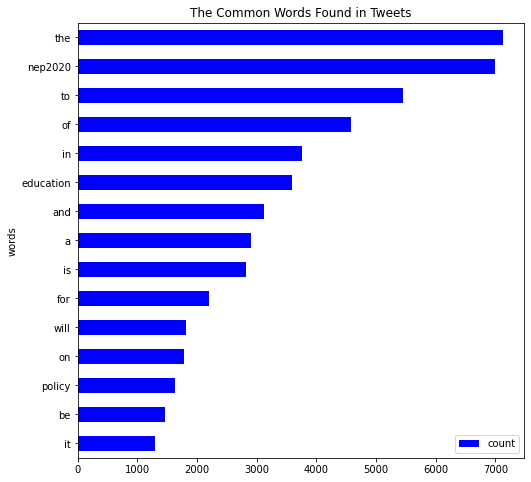

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("The Common Words Found in Tweets")

plt.show()

### Remove Stopwords With nltk Package

In addition to lowercase words we must remove words that do not add meaningful information to the text that we are trying to analyze. These words are referred to as “stop words” and include commonly appearing words such as who, what, you, etc.


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['had',
 'or',
 'yourselves',
 'nor',
 'all',
 "hadn't",
 'how',
 'm',
 'weren',
 'whom']

In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['historically',
 'tamilnadu',
 'state',
 'progressive',
 'socialpolicies',
 'amp',
 'high',
 'stateprivate',
 'investments',
 'education',
 'without',
 'pitfalls',
 'one',
 'best',
 'india',
 'states',
 'involved',
 'framing',
 'nep2020',
 'alleged',
 'hereim',
 'surprised']

__We again create a counter to return the most commonly used words and the number of times that they were used.__

In [ ]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('nep2020', 6996),
 ('education', 3587),
 ('policy', 1635),
 ('india', 1057),
 ('new', 1041),
 ('narendramodi', 1029),
 ('nep', 828),
 ('2020', 815),
 ('amp', 810),
 ('pm', 697),
 ('national', 678),
 ('language', 660),
 ('students', 658),
 ('drrpnishank', 561),
 ('school', 535)]

__This plot displays the frequency of the words in the tweets on NEP2020, after URLs and stop words have been removed.__

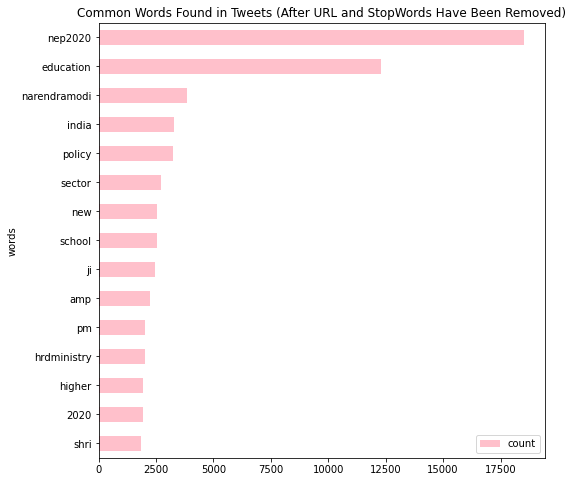

In [ ]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pink")

ax.set_title("Common Words Found in Tweets (After URL and StopWords Have Been Removed)")

plt.show()

### Remove Collection Words

Collection words are the words that are used to query the data from Twitter according to the usecase.

As we have used “NationalEducationPolicy” as a collection term, we can expect that these terms will be found more extensively in each tweet which could skew the word frequency analysis.

So we remove the collection words from the tweets through list comprehension.

In [ ]:
collection_words = ['nep2020','nep', 'NationalEducationPolicy','nationaleducationpolicy','2020']

In [ ]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [ ]:
tweets_nsw_nc[0]

['historically',
 'tamilnadu',
 'state',
 'progressive',
 'socialpolicies',
 'amp',
 'high',
 'stateprivate',
 'investments',
 'education',
 'without',
 'pitfalls',
 'one',
 'best',
 'india',
 'states',
 'involved',
 'framing',
 'alleged',
 'hereim',
 'surprised']

### Calculate and Plot Word Frequency of Clean Tweets
<br>

__As the data has been cleaned now, we can calculate and plot the final word frequency results.__


In [ ]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('education', 3587),
 ('policy', 1635),
 ('india', 1057),
 ('new', 1041),
 ('narendramodi', 1029),
 ('amp', 810),
 ('pm', 697),
 ('national', 678),
 ('language', 660),
 ('students', 658),
 ('drrpnishank', 561),
 ('school', 535),
 ('system', 514),
 ('hrdministry', 489),
 ('neweducationpolicy', 466)]

In [ ]:
len(counts_nsw_nc)

16305

In [ ]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,education,3587
1,policy,1635
2,india,1057
3,new,1041
4,narendramodi,1029


__This plot displays the frequency of all words in the tweets on National Education Policy after URLs, stop words, and collection words have been removed.__

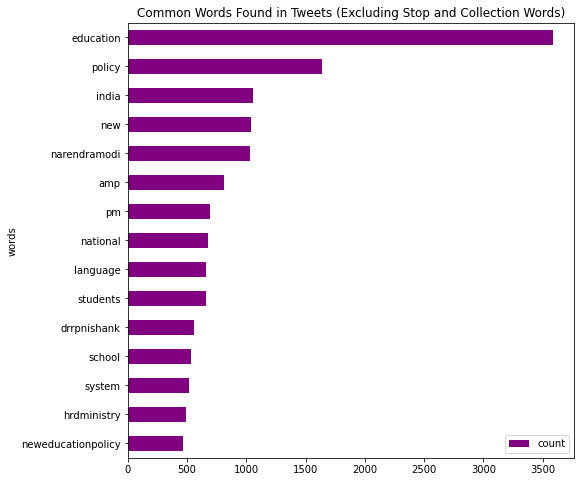

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Excluding Stop and Collection Words)")

plt.show()

#### Interpretation:

From all these graphs we can understand that 

- Education
- Narendra Modi
- India
- Policy
- Sector

are the most used words in the tweets collected.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
cleaned = pd.read_csv('cleaned1 (1).csv')

In [ ]:
cleaned.head()

,Unnamed: 0,Date_of_tweet,Tweet,Likes_on_tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,Polarity,Subjectivity
0,0,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,Historically TamilNadu has been a state with p...,"['historically', 'tamilnadu', 'has', 'been', '...","['historically', 'tamilnadu', 'state', 'progre...","['histor', 'tamilnadu', 'state', 'progress', '...","['historically', 'tamilnadu', 'state', 'progre...",0.232000,0.368000
1,1,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,HelloStrangerEP HarrisonFord GeorgeFloyd JiCha...,"['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...",0.000000,0.000000
2,2,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,cbseindia PMOIndia narendramodi DrRPNishank AB...,"['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...",-0.015909,0.394886
3,3,2020-08-04 22:20:56+00:00,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...,1,PMOIndia’s antidemocratic NEP was pgs in dra...,"['pmoindia', 's', 'antidemocratic', 'nep', 'wa...","['pmoindia', 'antidemocratic', 'nep', 'pgs', '...","['pmoindia', 'antidemocrat', 'nep', 'pg', 'dra...","['pmoindia', 'antidemocratic', 'nep', 'pgs', '...",0.375000,0.750000
4,4,2020-08-04 21:01:14+00:00,The latest The Nursing Education Daily! http:/...,0,The latest The Nursing Education Daily httpned...,"['the', 'latest', 'the', 'nursing', 'education...","['latest', 'nursing', 'education', 'daily', 'h...","['latest', 'nurs', 'educ', 'daili', 'httpnedsk...","['latest', 'nursing', 'education', 'daily', 'h...",0.233333,0.366667


In [ ]:
del cleaned['Unnamed: 0']

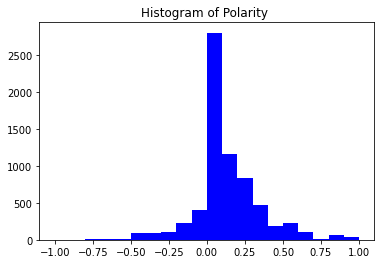

In [ ]:
# Plots histogram of polarity 
plt.subplot()
cleaned["Polarity"].hist(bins=20,color='blue')
plt.title("Histogram of Polarity ")
plt.grid(b=None)

__From the above histogram we can say that many tweets have the polarity value 0 and it is skewed to the right indicating that many tweets are positive.__

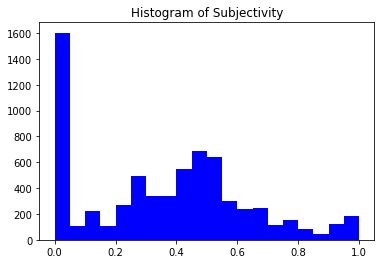

In [ ]:
# Plots histogram of polarity 
plt.subplot()
cleaned["Subjectivity"].hist(bins=20,color='blue')
plt.title("Histogram of Subjectivity")
plt.grid(b=None)

**From the above histogram of subjectivity score it can be observed that majority of the tweets are based on factual information and are not biased with personal views.**

### Displaying the most popular tweets

In [ ]:
cleaned.sort_values(by=["Likes_on_tweet" ], ascending=False)[["Tweet","Likes_on_tweet"]].head(10)

,Tweet,Likes_on_tweet
6581,ENGLISH MEDIUM... Blessing or Curse for India....,2694
1286,~Not many people know that Raksha Bandhan is a...,1837
511,"Under #NEP2020, #BoardExams will have greater ...",1573
952,#NEP2020 lays emphasis on the promotion of Ind...,1530
1873,Our vision is to build an #education system th...,1362
5144,Thank you for your great insights on #NewEduca...,1114
1141,#NEP2020 emphasises the use of technology for ...,1060
3891,Teachers are an integral part of any instituti...,1058
3248,My take on #NEP2020 Part 2 School Education,1046
6298,Thank you @SubhashGhai1 ji for your kind words...,1042


#### Removing outliers

In [ ]:
Top_Tweets = cleaned[cleaned["Likes_on_tweet"]<2000]

### Visualizing relationship between top tweets and polarity value

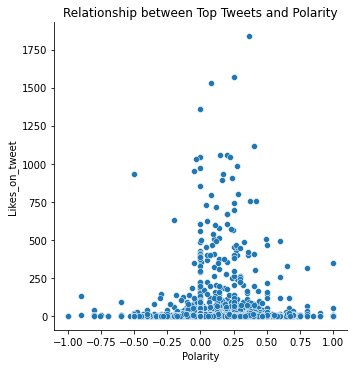

In [ ]:
sns.relplot(x="Polarity", y="Likes_on_tweet", data=Top_Tweets).set(title='Relationship between Top Tweets and Polarity')

__From the above plot, we can say that as the polarity of tweet is increasing, the likes of that particular tweet are also increasing. We can conclude that many people are strongly supporting the NEP__

<br>

### Visualizing relationship between top tweets and subjectivity value¶

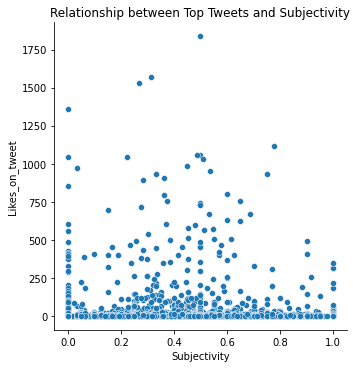

In [ ]:
sns.relplot(x="Subjectivity", y="Likes_on_tweet", data=Top_Tweets).set(title='Relationship between Top Tweets and Subjectivity')

There is more dispersion in the number of likes for tweets with subjectivity less than 0.5 than those with greater subjectivity. Also, it can be inferred that the tweet with the highest likes has subjectivity 0.5. Implying that the most popular tweet has an equal proportion of factual information and personal opinion.  

In [ ]:
# Function that classifies polarities
def classify_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"

# Applies the funtion on Polarity column and add the results into a new column "Label"
cleaned["Label"] = cleaned["Polarity"].apply(classify_polarity)

# Displays the Polarity and Subjectivity Analysis
cleaned[["Label"]].head()

,Label
0,Positive
1,Neutral
2,Negative
3,Positive
4,Positive


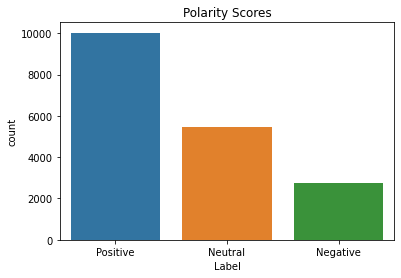

In [ ]:
# Visualising the Label count
sns.countplot(x=cleaned["Label"])
plt.title("Polarity Scores")
plt.show()

<AxesSubplot:ylabel='Label'>

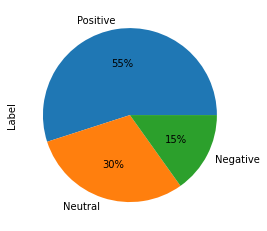

In [ ]:
# Plots pie chart
cleaned['Label'].value_counts().plot(kind='pie',autopct='%1.0f%%')

#### Many of the tweets collected are classfied as Positive and very less percentage of them are against the National Education Policy 2020 which is to be implememted in India.

### Visualizing Subjectivity vs Polarity scores

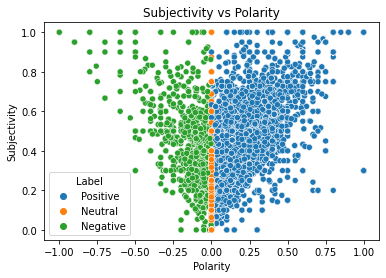

In [ ]:
plt.figure() 
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", data=cleaned)
plt.title("Subjectivity vs Polarity")
plt.show()

__The above plot visualizes how the different classes - positive, neutral and negative sentiments are distributed based on Polarity and Subjectivity score__

<br>

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import urllib
import requests

#### Segregating words as positive and negative based on Polarity scores

In [ ]:
positive_words = ' '.join(text for text in cleaned['Tweet_lemmatized'][cleaned['Polarity']==1])
negative_words = ' '.join(text for text in cleaned['Tweet_lemmatized'][cleaned['Polarity']==-1])

### Word Cloud for Positive Words

(-0.5, 399.5, 199.5, -0.5)

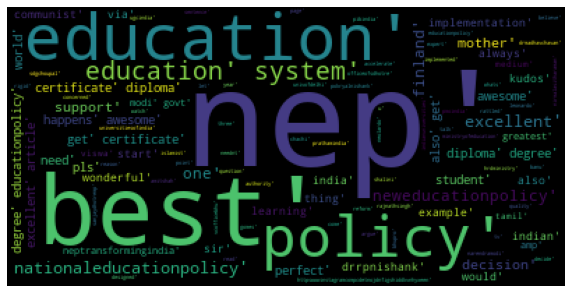

In [ ]:
wc = WordCloud(background_color='black').generate(positive_words)

# Size of the image generated 
plt.figure(figsize=(10,20))
 
plt.imshow(wc.recolor())
plt.axis('off')


#### The highlighted and the words in largest font are the most occuring words.

#### Here, the words - best, nep, policy, education, excellent are the most used words in positive tweets.

### Word Cloud for Negative Words

(-0.5, 3999.5, 999.5, -0.5)

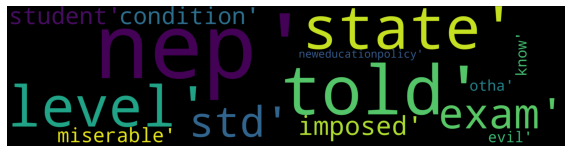

In [ ]:
wc = WordCloud(background_color='black', height=1000, width=4000).generate(negative_words)

# Size of the image generated 
plt.figure(figsize=(10,20))
 
plt.imshow(wc.recolor())

plt.axis('off')


#### The highlighted and the words in largest font are the most occuring words.

#### Here, the words - exam, told, state, level, student are the most used words in negative tweets.

<br>

### Identifying the intensity of the sentiments for positive, negative and neutral tweets

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\krishna
[nltk_data]     meghana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sentiments = SentimentIntensityAnalyzer()
cleaned["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in cleaned["Tweet"]]
cleaned["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in cleaned["Tweet"]]
cleaned["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in cleaned["Tweet"]]

In [ ]:
cleaned.head()

,Unnamed: 0,Date_of_tweet,Tweet,Likes_on_tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,Polarity,Subjectivity,Label,Positive,Negative,Neutral
0,0,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,Historically TamilNadu has been a state with p...,"['historically', 'tamilnadu', 'has', 'been', '...","['historically', 'tamilnadu', 'state', 'progre...","['histor', 'tamilnadu', 'state', 'progress', '...","['historically', 'tamilnadu', 'state', 'progre...",0.232000,0.368000,Positive,0.197,0.000,0.803
1,1,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,HelloStrangerEP HarrisonFord GeorgeFloyd JiCha...,"['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...","['hellostrangerep', 'harrisonford', 'georgeflo...",0.000000,0.000000,Neutral,0.000,0.000,1.000
2,2,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,cbseindia PMOIndia narendramodi DrRPNishank AB...,"['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...","['cbseindia', 'pmoindia', 'narendramodi', 'drr...",-0.015909,0.394886,Negative,0.118,0.000,0.882
3,3,2020-08-04 22:20:56+00:00,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...,1,PMOIndia’s antidemocratic NEP was pgs in dra...,"['pmoindia', 's', 'antidemocratic', 'nep', 'wa...","['pmoindia', 'antidemocratic', 'nep', 'pgs', '...","['pmoindia', 'antidemocrat', 'nep', 'pg', 'dra...","['pmoindia', 'antidemocratic', 'nep', 'pgs', '...",0.375000,0.750000,Positive,0.095,0.056,0.849
4,4,2020-08-04 21:01:14+00:00,The latest The Nursing Education Daily! http:/...,0,The latest The Nursing Education Daily httpned...,"['the', 'latest', 'the', 'nursing', 'education...","['latest', 'nursing', 'education', 'daily', 'h...","['latest', 'nurs', 'educ', 'daili', 'httpnedsk...","['latest', 'nursing', 'education', 'daily', 'h...",0.233333,0.366667,Positive,0.197,0.000,0.803


### Calculating the sentiment score of tweets and printing the highest 

In [ ]:
x = sum(cleaned["Positive"])
y = sum(cleaned["Negative"])
z = sum(cleaned["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


__So the most of the tweets are neutral, which means people are neither strongly supporting nor opposing it__

In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1960.8209999999574
Negative:  583.1870000000109
Neutral:  15696.084000000383


__The total of neutral is way higher than negative and positive, but out of all the tweets, the positive tweets are more than the negative tweets, so we can say that most of the opinions are positive.__